

Code adapted from "Custom Object Detection Using Tensorflow in Google Colab"



Installing tensorflow

In [1]:
%tensorflow_version 1.x # Select module of the tensorflow

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.x # Select module of the tensorflow`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [2]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip

--2021-08-02 19:16:33--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.231.73.243, 54.174.143.90, 3.88.118.105, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.231.73.243|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  13.9MB/s    in 1.0s    

2021-08-02 19:16:34 (13.9 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [3]:
#the logs that are created while training 
LOG_DIR = "/root/models/trained"
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
get_ipython().system_raw('./ngrok http 6006 &')
#The link to tensorboard.
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"


Traceback (most recent call last):
  File "<string>", line 1, in <module>
IndexError: list index out of range


In [4]:
!python -c 'import matplotlib as tf; print(tf.__version__)' # Check the version of the tensorflow


3.2.2


In [5]:
%cd /root

/root


Cloning Object Detection Models from Github

In [6]:
!git clone https://github.com/tensorflow/models.git # Import required files from the website


Cloning into 'models'...
remote: Enumerating objects: 59568, done.
remote: Counting objects: 100% (1048/1048), done.
remote: Compressing objects: 100% (398/398), done.
remote: Total 59568 (delta 709), reused 943 (delta 632), pack-reused 58520
Receiving objects: 100% (59568/59568), 573.73 MiB | 25.41 MiB/s, done.
Resolving deltas: 100% (41335/41335), done.


Testing a File in Cloned Object Detection File 

In [7]:
%cd /root/models/research/
!protoc object_detection/protos/*.proto --python_out=.
!python setup.py build

/root/models/research
python3: can't open file 'setup.py': [Errno 2] No such file or directory


In [8]:
import os
os.environ['PYTHONPATH'] += ':/root/models/research/:/root/models/research/slim/:/root/models/research/object_detection/utils/:/root/models/research/object_detection'

In [9]:
!pip install tf_slim

     |████████████████████████████████| 352 kB 15.7 MB/s 


In [10]:
!python object_detection/builders/model_builder_test.py

In [11]:
#!python3 --version

!python -c 'import tensorflow as tf; print(tf.__version__)'

1.15.2


Import Labelled Images from Github

In [12]:
%cd /root/models/
!git clone https://github.com/emurphy7/Odometer_project  

/root/models
Cloning into 'Odometer_project'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 119 (delta 35), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (119/119), 72.35 MiB | 14.79 MiB/s, done.
Resolving deltas: 100% (35/35), done.


In [13]:
import os
import shutil
import glob
import urllib
import tarfile
from requests import get
source = '/root/models/Odometer_project/odometer'
destination = '/root/models/'
shutil.move('/root/models/Odometer_project/odometer',  '/root/models/') 

'/root/models/odometer'

In [14]:
os.getcwd()

'/root/models'

In [15]:
# full Dataset
#from google.colab import drive
#drive.mount('/content/drive')

In [16]:
#!cp -r /content/drive/MyDrive/ODOMETER_FILTERED /root/models/

In [17]:
#create train / test datasets ( Full dataset will just be uploaded from laptop)
import pandas as pd
import numpy as np

df = pd.read_csv("/root/models/Odometer_project/small_data/Odo_small_dataset.csv")
#df['split'] = np.random.randn(df.shape[0], 1)
msk = np.random.rand(len(df)) <= 0.75

train = df[msk]
test = df[~msk]
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)


In [18]:
compression_opts = dict(method='zip',
                        archive_name='train.csv') 
train.to_csv('train.zip', index=False,
          compression=compression_opts) 
compression_opts = dict(method='zip',
                        archive_name='test.csv') 
test.to_csv('test.zip', index=False,
             compression=compression_opts) 

In [19]:
!unzip \*.zip  && rm *.zip

Archive:  test.zip
  inflating: test.csv                

Archive:  train.zip
  inflating: train.csv               

2 archives were successfully processed.


In [20]:
!cp -r /root/models/test.csv /root/models/odometer/data/test_labels.csv

In [21]:
!cp -r /root/models/train.csv /root/models/odometer/data/train_labels.csv

Upload test and train csv files


In [22]:
%cd /root/models/research/
!protoc object_detection/protos/*.proto --python_out=.
#!export PYTHONPATH=$PYTHONPATH: /usr/local/lib/python3.6/dist-packages/tensorflow/models/research/:/usr/local/lib/python3.6/dist-packages/tensorflow/models/research/slim
#!pwd
#!python /usr/local/lib/python3.6/dist-packages/tensorflow/models/research/object_detection/builders/model_builder_test.py
#!python setup.py build
import os
os.environ['PYTHONPATH'] += ':/root/models/research/:/root/models/research/slim/:/root/models/research/object_detection/utils/:/root/models/research/object_detection'
"""
Usage:
  # From tensorflow/models/
  # Create train data:
  python generate_tfrecord.py --csv_input=data/train_labels.csv  --output_path=train.record

  # Create test data:
  python generate_tfrecord.py --csv_input=data/test_labels.csv  --output_path=test.record
"""
%cd /root/models/odometer/tfrecord
# change path for full dataset
!python generate_tfrecord.py --csv_input=/root/models/odometer/data/train_labels.csv  --output_path=train.record --image_dir=/root/models/Odometer_project/small_data/small_odometer_dataset
!python generate_tfrecord.py --csv_input=/root/models/odometer/data/test_labels.csv  --output_path=test.record --image_dir=/root/models/Odometer_project/small_data/small_odometer_dataset





/root/models/research
/root/models/odometer/tfrecord


W0802 19:17:27.421816 140424017340288 module_wrapper.py:139] From generate_tfrecord.py:87: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0802 19:17:27.430088 140424017340288 module_wrapper.py:139] From generate_tfrecord.py:46: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /root/models/odometer/tfrecord/train.record


W0802 19:17:29.618862 140460738996096 module_wrapper.py:139] From generate_tfrecord.py:87: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0802 19:17:29.629823 140460738996096 module_wrapper.py:139] From generate_tfrecord.py:46: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /root/models/odometer/tfrecord/test.record


Downloading Pre-trained Models

In [23]:
#'model_name': 'faster_rcnn_inception_v2_coco_2018_01_28',
#        'pipeline_file': 'faster_rcnn_inception_v2_pets.config',
#
%cd ~/models

import os
import shutil
import glob
import urllib
import tarfile
from requests import get

MODEL = 'ssd_mobilenet_v2_coco_2018_03_29'
MODEL_FILE = MODEL + '.tar.gz'
DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'
DEST_DIR = 'pretrained_model'

if not (os.path.exists(MODEL_FILE)):
  with open(MODEL_FILE, "wb") as file:
    # get request
    response = get(DOWNLOAD_BASE + MODEL_FILE)
    # write to file
    file.write(response.content)

tar = tarfile.open(MODEL_FILE)
tar.extractall()
tar.close()

os.remove(MODEL_FILE)
if (os.path.exists(DEST_DIR)):
  shutil.rmtree(DEST_DIR)
os.rename(MODEL, DEST_DIR)

/root/models


In [24]:
# Move Config file to directory "models"
shutil.move("/root/models/research/object_detection/samples/configs/ssd_mobilenet_v2_coco.config", "/root/models") 

'/root/models/ssd_mobilenet_v2_coco.config'

Modifying the Config File

In [25]:
%cd /root/models/research/
!protoc object_detection/protos/*.proto --python_out=.
#!export PYTHONPATH=$PYTHONPATH: /usr/local/lib/python3.6/dist-packages/tensorflow/models/research/:/usr/local/lib/python3.6/dist-packages/tensorflow/models/research/slim
#!pwd
#!python /usr/local/lib/python3.6/dist-packages/tensorflow/models/research/object_detection/builders/model_builder_test.py
#!python setup.py build
import os
os.environ['PYTHONPATH'] += ':/root/models/research/:/root/models/research/slim/:/root/models/research/object_detection/utils/:/root/models/research/object_detection'

# Edit Pipeline 
import tensorflow as tf
from google.protobuf import text_format
from object_detection.protos import pipeline_pb2

pipeline = pipeline_pb2.TrainEvalPipelineConfig()                                                                                                                                                                                                          
config_path = '/root/models/ssd_mobilenet_v2_coco.config'
with tf.gfile.GFile( config_path, "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline)

pipeline.train_input_reader.tf_record_input_reader.input_path[:] = ['/root/models/odometer/tfrecord/train.record'] 
pipeline.train_input_reader.label_map_path = '/root/models/odometer/data/object-detection.pbtxt'
pipeline.eval_input_reader[0].tf_record_input_reader.input_path[:] = ['/root/models/odometer/tfrecord/test.record'] 
pipeline.eval_input_reader[0].label_map_path = '/root/models/odometer/data/object-detection.pbtxt'
pipeline.train_config.fine_tune_checkpoint = '/root/models/pretrained_model/model.ckpt'
pipeline.train_config.num_steps = 10000
pipeline.model.ssd.num_classes = 1
pipeline.eval_config.num_examples = len(test)

config_text = text_format.MessageToString(pipeline)                                                                                                                                                                                                        
with tf.gfile.Open( config_path, "wb") as f:                                                                                                                                                                                                                       
    f.write(config_text)


/root/models/research


Training

In [26]:
# Change into the models directory
%cd /root/models/research/
!protoc object_detection/protos/*.proto --python_out=.
import os
os.environ['PYTHONPATH'] += ':/root/models/research/:/root/models/research/slim/:/root/models/research/object_detection/utils/:/root/models/research/object_detection'

# Begin training
!python /root/models/research/object_detection/legacy/train.py \
    --logtostderr \
    --train_dir=/root/models/trained \
    --pipeline_config_path=/root/models/ssd_mobilenet_v2_coco.config


Streaming output truncated to the last 5000 lines.
INFO:tensorflow:global step 7513: loss = 0.7215 (0.231 sec/step)
I0802 19:49:09.640462 140624834570112 learning.py:512] global step 7513: loss = 0.7215 (0.231 sec/step)
INFO:tensorflow:global step 7514: loss = 0.7164 (0.236 sec/step)
I0802 19:49:09.877508 140624834570112 learning.py:512] global step 7514: loss = 0.7164 (0.236 sec/step)
INFO:tensorflow:global step 7515: loss = 0.5133 (0.243 sec/step)
I0802 19:49:10.122313 140624834570112 learning.py:512] global step 7515: loss = 0.5133 (0.243 sec/step)
INFO:tensorflow:global step 7516: loss = 0.6188 (0.248 sec/step)
I0802 19:49:10.371601 140624834570112 learning.py:512] global step 7516: loss = 0.6188 (0.248 sec/step)
INFO:tensorflow:global step 7517: loss = 0.6144 (0.235 sec/step)
I0802 19:49:10.607661 140624834570112 learning.py:512] global step 7517: loss = 0.6144 (0.235 sec/step)
INFO:tensorflow:global step 7518: loss = 0.9960 (0.233 sec/step)
I0802 19:49:10.842018 140624834570112 l

Exporting Trained Model

In [27]:
#Export trained model 
%cd /root/models/research
!protoc object_detection/protos/*.proto --python_out=.
import os
os.environ['PYTHONPATH'] += ':/root/models/research/:/root/models/research/slim/:/root/models/research/object_detection/utils/:/root/models/research/object_detection'
!python /root/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path=/root/models/ssd_mobilenet_v2_coco.config \
    --output_directory=/root/models/fine_tuned_model \
    --trained_checkpoint_prefix=/root/models/trained/model.ckpt-10000

/root/models/research
Instructions for updating:
Please use `layer.__call__` method instead.
W0802 19:59:22.380742 139863321806720 deprecation.py:323] From /usr/local/lib/python3.7/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0802 19:59:24.571809 139863321806720 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0802 19:59:24.613955 139863321806720 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0802 19:59:24.656203 139863321806720 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth o

Detection

In [28]:
#!cp -r  /root /content/drive/MyDrive/root_odometer_trained_longer

In [29]:
#save checkpoints 
#!cp -r  /root/models/trained  /content/drive/MyDrive/odo_trained_v2_140k 

In [30]:
#save inference graph
#!cp -r  /root/models/fine_tuned_model/frozen_inference_graph.pb /content/drive/MyDrive/frozen_inference_graph_odo_v2_2.pb

In [31]:
import pathlib
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display

from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util
# This is needed to display the images.
%matplotlib inline


In [32]:
# What model to download.
# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = '/root/models/fine_tuned_model' + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/root/models/odometer/data/object-detection.pbtxt'

NUM_CLASSES = 1


In [33]:
detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')


In [34]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


In [35]:
def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)


In [36]:
import pandas as pd
dfs = pd.read_csv("/root/models/odometer/data/test_labels.csv")
file_names = dfs['filename']
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = '/root/models/Odometer_project/small_data/small_odometer_dataset'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, file_names[i]) for i in range(len(file_names)) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


In [37]:
def run_inference_for_single_image(image, graph):
  with graph.as_default():
    with tf.Session() as sess:
      # Get handles to input and output tensors
      ops = tf.get_default_graph().get_operations()
      all_tensor_names = {output.name for op in ops for output in op.outputs}
      tensor_dict = {}
      for key in [
          'num_detections', 'detection_boxes', 'detection_scores',
          'detection_classes', 'detection_masks'
      ]:
        tensor_name = key + ':0'
        if tensor_name in all_tensor_names:
          tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
              tensor_name)
      if 'detection_masks' in tensor_dict:
        # The following processing is only for single image
        detection_boxes = tf.squeeze(tensor_dict['detection_boxes'], [0])
        detection_masks = tf.squeeze(tensor_dict['detection_masks'], [0])
        # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
        real_num_detection = tf.cast(tensor_dict['num_detections'][0], tf.int32)
        detection_boxes = tf.slice(detection_boxes, [0, 0], [real_num_detection, -1])
        detection_masks = tf.slice(detection_masks, [0, 0, 0], [real_num_detection, -1, -1])
        detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
            detection_masks, detection_boxes, image.shape[0], image.shape[1])
        detection_masks_reframed = tf.cast(
            tf.greater(detection_masks_reframed, 0.1), tf.uint8)
        # Follow the convention by adding back the batch dimension
        tensor_dict['detection_masks'] = tf.expand_dims(
            detection_masks_reframed, 0)
      image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

      # Run inference
      output_dict = sess.run(tensor_dict,
                             feed_dict={image_tensor: np.expand_dims(image, 0)})

      # all outputs are float32 numpy arrays, so convert types as appropriate
      output_dict['num_detections'] = int(output_dict['num_detections'][0])
      output_dict['detection_classes'] = output_dict[
          'detection_classes'][0].astype(np.uint8)
      output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
      output_dict['detection_scores'] = output_dict['detection_scores'][0]
      if 'detection_masks' in output_dict:
        output_dict['detection_masks'] = output_dict['detection_masks'][0]
  return output_dict


range(0, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to b

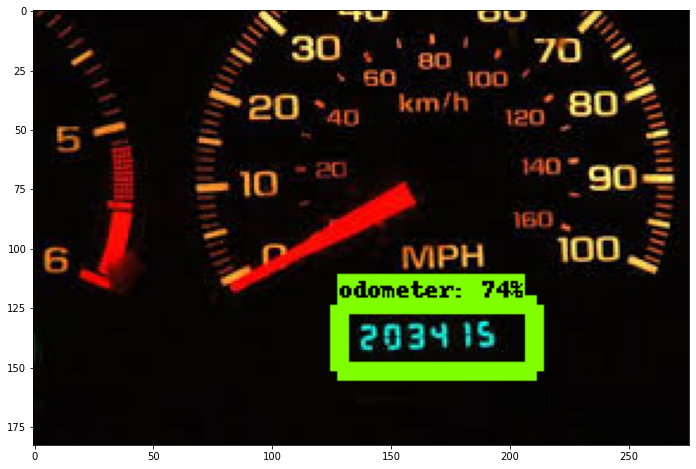

In [38]:
import pandas as pd
import numpy as np
import math
import pandas as pd
from PIL import Image
import json
from PIL import ImageFile, Image
ImageFile.LOAD_TRUNCATED_IMAGES = True
columns = ['filename', 'box1_xmin','box1_ymin','box1_ymax','box1_xmax','box2_xmin','box2_ymin','box2_ymax','box2_xmax','box3_xmin','box3_ymin','box3_ymax','box3_xmax', 'box4_xmin','box4_ymin','box4_ymax','box4_xmax','box1_score','box2_score','box3_score','box4_score']
N = range(len(file_names))
print(N)
df_ = pd.DataFrame(index=N,  columns=columns)
df_ = df_.fillna(0) # with 0s rather than NaNs
file_name = df_['filename']
box1_xmin = df_['box1_xmin']
box1_ymin = df_['box1_ymin']
box1_ymax = df_['box1_ymax']
box1_xmax = df_['box1_xmax']
box2_xmin = df_['box2_xmin']
box2_ymin = df_['box2_ymin']
box2_ymax = df_['box2_ymax']
box2_xmax = df_['box2_xmax']
box3_xmin = df_['box3_xmin']
box3_ymin = df_['box3_ymin']
box3_ymax = df_['box3_ymax']
box3_xmax = df_['box3_xmax']
box4_xmin = df_['box4_xmin']
box4_ymin = df_['box4_ymin']
box4_ymax = df_['box4_ymax']
box4_xmax = df_['box4_xmax']
box1_score =df_['box1_score']
box2_score =df_['box2_score']
box3_score =df_['box3_score']
box4_score =df_['box4_score']
count = 0;
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  boxs = output_dict['detection_boxes']
  score = output_dict['detection_scores']
  file_name[count] = image_path[34:]
  box1_xmin[count] = float(boxs[0][0]) * 100
  box1_ymin[count] = boxs[0][1] * 100
  box1_ymax[count] = boxs[0][2] * 100 
  box1_xmax[count] = boxs[0][3] * 100 
  box2_xmin[count] = boxs[1][0] * 100 
  box2_ymin[count] = boxs[1][1] * 100
  box2_ymax[count] = boxs[1][2] * 100
  box2_xmax[count] = boxs[1][3] * 100 
  box3_xmin[count] = boxs[2][0] * 100
  box3_ymin[count] = boxs[2][1] * 100
  box3_ymax[count] = boxs[2][2] * 100
  box3_xmax[count] = boxs[2][3] * 100
  box4_xmin[count] = boxs[3][0] * 100
  box4_ymin[count] = boxs[3][1] * 100
  box4_ymax[count] = boxs[3][2] * 100
  box4_xmax[count] = boxs[3][3] * 100
  box1_score[count] = score[0] * 100
  box2_score[count] = score[1] * 100
  box3_score[count] = score[2] * 100
  box4_score[count] = score[3] * 100
  #print(box4_score)
  count = count + 1;
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8, mask_alpha = .1, min_score_thresh = .05, max_boxes_to_draw = 1)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)


In [39]:
#for i in range(len(file_names)):
 # df_['filename'][i] = file_names[i]

In [40]:
# create csv file with test results for screen detection
compression_opts = dict(method='zip',
                        archive_name='odometer_small.csv') 
df_.to_csv('odometer_small.zip', index=False,
          compression=compression_opts) 

In [41]:
!unzip \*.zip  && rm *.zip

Archive:  odometer_small.zip
  inflating: odometer_small.csv      


In [42]:
### DIGIT DETECTION SECTION 

In [43]:
import os
import shutil
import glob
import urllib
import tarfile
from requests import get
source = '/root/models/Odometer_project/character'
destination = '/root/models/'
shutil.move('/root/models/Odometer_project/character',  '/root/models/') 

'/root/models/character'

In [44]:
#create train / test datasets
import pandas as pd
import numpy as np

df = pd.read_csv('/root/models/Odometer_project/small_data/Character_small_dataset.csv')
#df['split'] = np.random.randn(df.shape[0], 1)
msk = np.random.rand(len(df)) <= 0.85

train = df[msk]
test = df[~msk]
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)


In [45]:
%cd /root

/root


In [46]:
compression_opts = dict(method='zip',
                        archive_name='train_1.csv') 
train.to_csv('train_1.zip', index=False,
          compression=compression_opts) 
compression_opts = dict(method='zip',
                        archive_name='test_1.csv') 
test.to_csv('test_1.zip', index=False,
             compression=compression_opts) 

In [47]:
!unzip \*.zip  && rm *.zip

Archive:  test_1.zip
  inflating: test_1.csv              

Archive:  train_1.zip
  inflating: train_1.csv             

2 archives were successfully processed.


In [48]:
ls

models/  test_1.csv  train_1.csv


In [49]:
!cp -r /root/test_1.csv /root/models/character/data/test_labels.csv

In [50]:
!cp -r /root/train_1.csv /root/models/character/data/train_labels.csv

In [51]:
from PIL import Image
import json
from PIL import ImageFile, Image
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [52]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET

In [53]:
%cd /root/models/research/
!protoc object_detection/protos/*.proto --python_out=.
import os
os.environ['PYTHONPATH'] += ':/root/models/research/:/root/models/research/slim/:/root/models/research/object_detection/utils/:/root/models/research/object_detection'
"""
Usage:
  # From tensorflow/models/
  # Create train data:
  python generate_tfrecord.py --csv_input=data/train_labels.csv  --output_path=train.record

  # Create test data:
  python generate_tfrecord.py --csv_input=data/test_labels.csv  --output_path=test.record
"""
%cd /root/models/character/tfrecord
!python generate_tfrecord.py --csv_input=/root/models/character/data/train_labels.csv  --output_path=train.record --image_dir=/root/models/Odometer_project/small_data/small_cropped_images_bicubic_result_sharpen
!python generate_tfrecord.py --csv_input=/root/models/character/data/test_labels.csv  --output_path=train.record --image_dir=/root/models/Odometer_project/small_data/small_cropped_images_bicubic_result_sharpen





/root/models/research
/root/models/character/tfrecord


W0802 19:59:39.312452 140165439756160 module_wrapper.py:139] From generate_tfrecord.py:118: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0802 19:59:39.318762 140165439756160 module_wrapper.py:139] From generate_tfrecord.py:77: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /root/models/character/tfrecord/train.record


W0802 19:59:41.449229 140427819550592 module_wrapper.py:139] From generate_tfrecord.py:118: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0802 19:59:41.454772 140427819550592 module_wrapper.py:139] From generate_tfrecord.py:77: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /root/models/character/tfrecord/train.record


In [60]:
%cd /root/models/research/
!protoc object_detection/protos/*.proto --python_out=.
import os
os.environ['PYTHONPATH'] += ':/root/models/research/:/root/models/research/slim/:/root/models/research/object_detection/utils/:/root/models/research/object_detection'

# Edit Pipeline 
import tensorflow as tf
import tensorflow.compat.v1 as tf
from google.protobuf import text_format
from object_detection.protos import pipeline_pb2

pipeline = pipeline_pb2.TrainEvalPipelineConfig()                                                                                                                                                                                                          
config_path = '/root/models/ssd_mobilenet_v2_coco.config'

with tf.gfile.GFile( config_path, "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline)

pipeline.train_input_reader.tf_record_input_reader.input_path[:] = ['/root/models/character/tfrecord/train.record'] 
pipeline.train_input_reader.label_map_path = '/root/models/character/data/object-detection.pbtxt'
pipeline.eval_input_reader[0].tf_record_input_reader.input_path[:] = ['/root/models/character/tfrecord/test.record'] 
pipeline.eval_input_reader[0].label_map_path = '/root/models/character/data/object-detection.pbtxt'
pipeline.train_config.fine_tune_checkpoint = '/root/models/pretrained_model/model.ckpt'
pipeline.train_config.num_steps = 10000
pipeline.model.ssd.num_classes = 11
pipeline.eval_config.num_examples = 16640

config_text = text_format.MessageToString(pipeline)                                                                                                                                                                                                        
with tf.gfile.Open( config_path, "wb") as f:                                                                                                                                                                                                                       
    f.write(config_text)

/root/models/research


In [61]:
# Change into the models directory
%cd /root/models/research/
!protoc object_detection/protos/*.proto --python_out=.
import os
os.environ['PYTHONPATH'] += ':/root/models/research/:/root/models/research/slim/:/root/models/research/object_detection/utils/:/root/models/research/object_detection'

# Begin training
!python /root/models/research/object_detection/legacy/train.py \
    --logtostderr \
    --train_dir=/root/models/trained_2 \
    --pipeline_config_path=/root/models/ssd_mobilenet_v2_coco.config


Streaming output truncated to the last 5000 lines.
INFO:tensorflow:global step 7517: loss = 0.7801 (0.236 sec/step)
I0802 20:33:01.788806 139820296341376 learning.py:512] global step 7517: loss = 0.7801 (0.236 sec/step)
INFO:tensorflow:global step 7518: loss = 0.8985 (0.236 sec/step)
I0802 20:33:02.026754 139820296341376 learning.py:512] global step 7518: loss = 0.8985 (0.236 sec/step)
INFO:tensorflow:global step 7519: loss = 0.9038 (0.246 sec/step)
I0802 20:33:02.274887 139820296341376 learning.py:512] global step 7519: loss = 0.9038 (0.246 sec/step)
INFO:tensorflow:global step 7520: loss = 0.7310 (0.224 sec/step)
I0802 20:33:02.500606 139820296341376 learning.py:512] global step 7520: loss = 0.7310 (0.224 sec/step)
INFO:tensorflow:global step 7521: loss = 1.0453 (0.231 sec/step)
I0802 20:33:02.733130 139820296341376 learning.py:512] global step 7521: loss = 1.0453 (0.231 sec/step)
INFO:tensorflow:global step 7522: loss = 0.9531 (0.232 sec/step)
I0802 20:33:02.966732 139820296341376 l

In [71]:
#Export trained model 
%cd /root/models/research
!protoc object_detection/protos/*.proto --python_out=.
import os
os.environ['PYTHONPATH'] += ':/root/models/research/:/root/models/research/slim/:/root/models/research/object_detection/utils/:/root/models/research/object_detection'
!python /root/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path=/root/models/ssd_mobilenet_v2_coco.config \
    --output_directory=/root/models/fine_tuned_model_2 \
    --trained_checkpoint_prefix=/root/models/trained_2/model.ckpt-10000

/root/models/research
Instructions for updating:
Please use `layer.__call__` method instead.
W0802 20:44:00.084608 140231621138304 deprecation.py:323] From /usr/local/lib/python3.7/dist-packages/tf_slim/layers/layers.py:1089: Layer.apply (from tensorflow.python.keras.engine.base_layer) is deprecated and will be removed in a future version.
Instructions for updating:
Please use `layer.__call__` method instead.
INFO:tensorflow:depth of additional conv before box predictor: 0
I0802 20:44:02.212506 140231621138304 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0802 20:44:02.253446 140231621138304 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth of additional conv before box predictor: 0
I0802 20:44:02.289835 140231621138304 convolutional_box_predictor.py:156] depth of additional conv before box predictor: 0
INFO:tensorflow:depth o

In [72]:
test = pd.read_csv('/root/models/odometer/data/test_labels.csv')

In [73]:
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/root/models/character/data/object-detection.pbtxt'

NUM_CLASSES = 11

In [84]:
## PATH to recently trained model
PATH_TO_CKPT = '/root/models/fine_tuned_model_2' + '/frozen_inference_graph.pb'
## Path to fully trained model (Will give better results)
PATH_TO_CKPT = '/root/models/character/fine_tuned' + '/frozen_inference_graph_v2_180.pb'
detection_graph_v2  =tf.Graph()
with detection_graph_v2.as_default():
  od_graph_def = tf.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')

In [85]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)

In [77]:
path = '/root/models/test_cropped'
os.mkdir(path)

In [78]:
#make cropped test images
import pandas as pd
test_cropped = pd.read_csv('/root/models/research/odometer_small.csv')

248 425 242 304


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


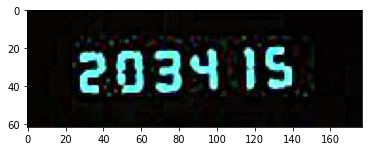

In [79]:
!cd /root/models/Odometer_project/small_data/small_odometer_dataset_bicubic_result_sharpen
for i in range(len(test_cropped)):
  name = '/root/models/Odometer_project/small_data/small_odometer_dataset_bicubic_result_sharpen/result_' +  test_cropped['filename'][i][30:]
  test_cropped['filename'][i] = test_cropped['filename'][i][30:]
  im = Image.open(name)
  w, h = im.size
  top = round((test_cropped['box1_xmin'][i]-1)   *( h /100 )) 
  if top < 0:
    top = 0
  left = round((test_cropped['box1_ymin'][i] -1)   * (w / 100))
  if left< 0 :
    left = 0
  bottom = round((test_cropped['box1_ymax'][i]+1)  *( h /100 )) 
  if bottom > h:
    bottom = h 
  right = round((test_cropped['box1_xmax'][i]+1)   *( w /100 ))
  if right > w:
    right = w

  print(left,right, top, bottom)
  im1 = im.crop((left, top, right, bottom))
  url_result = test_cropped['filename'][i]
  im1.save("/root/models/test_cropped/" + url_result, 'JPEG')
  plt.imshow(im1)

In [86]:
# To test the code with your image add the path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = '/root/models/test_cropped'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, file_names[i]) for i in range(len(test)) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)
print(TEST_IMAGE_PATHS)

['/root/models/test_cropped/odo_3.jpg']


In [81]:
true= pd.read_csv('/root/models/Odometer_project/small_data/True_mileage_small.csv')

Number from model : 203415
Accuracy: 1.0
Accuracy with 1k: 1.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


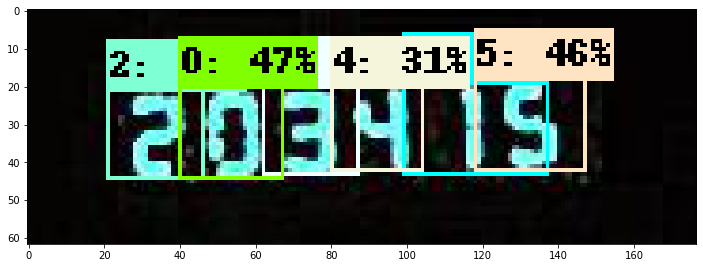

In [105]:
import pandas as pd
import numpy as np
import math
import networkx as nx
import statistics
columns = ['filename','mileage']
N = range(len(file_names))
df_ = pd.DataFrame(index=N,  columns=columns)
df_ = df_.fillna(0) # with 0s rather than NaNs
file_name = df_['filename']
mileage = df_['mileage']
count_v2 = 0;
count_v2_1000 = 0;
def listToString(s): 
    
    # initialize an empty string
    str1 = "" 
    
    # traverse in the string  
    for ele in s: 
        str1 += str(ele)  
    
    # return string  
    return str1 
thresh = [  .2]
for l in range(len(thresh)):
  count = 0;
  for image_path in TEST_IMAGE_PATHS:
    im_ind = int(image_path[30:-4]) -1
    if(true['mileage'][im_ind] != ''):
      Mileage = math.floor(float((true['mileage'][im_ind])))
    else:
      Mileage = 0
    file_name[count] = image_path[26:]
    image = Image.open(image_path)
    # the array based representation of the image will be used later in order to prepare the
    # result image with boxes and labels on it.
    image_np = load_image_into_numpy_array(image)
    # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
    image_np_expanded = np.expand_dims(image_np, axis=0)
    # Actual detection.
    #output_dict = run_inference_for_single_image(image_np, detection_graph)
    #boxs = output_dict['detection_boxes']
    #score = output_dict['detection_scores']
    #classification = output_dict['detection_classes']
    #print(classification)
    # Detection V2 
    output_dict_v2 = run_inference_for_single_image(image_np, detection_graph_v2)
    boxs_v2 = output_dict_v2['detection_boxes']
    score_v2 = output_dict_v2['detection_scores']
    classification_v2 = output_dict_v2['detection_classes']
    #vis_util.visualize_boxes_and_labels_on_image_array(
    #    image_np,
    #    boxs_v2,
    #    classification_v2,
    #    score_v2,
    #    category_index,
    #    instance_masks=output_dict_v2.get('detection_masks'),
    #    use_normalized_coordinates=True,
    #    line_thickness=4, mask_alpha = .1, min_score_thresh = .05, max_boxes_to_draw = 25)
    #plt.figure(figsize=IMAGE_SIZE)
    #plt.imshow(image_np)
    #remove characters V1 
    #ind = []
    #for i in range(output_dict['num_detections']):
    #  if classification[i] == 11:
    #    ind.append(i)
    #classification = np.delete(classification, ind, axis=0)
    #score = np.delete(score, ind, axis=0)
    #boxs = np.delete(boxs,ind,axis=0)
    #remove characters V2
    ind = []
    for i in range(output_dict_v2['num_detections']):
      if classification_v2[i] == 11:
        ind.append(i)
    classification_v2 = np.delete(classification_v2, ind, axis=0)
    score_v2 = np.delete(score_v2, ind, axis=0)
    boxs_v2 = np.delete(boxs_v2,ind,axis=0)
    # remove digits under a certain threshold V1
    #threshold = .01;
   # ind = []
   # for i in range(len(classification)):
    #  if(score[i] < threshold):
    #    ind.append(i)
    #classification = np.delete(classification, ind, axis=0)
    #score = np.delete(score, ind, axis=0)
    #boxs = np.delete(boxs,ind,axis=0)

    # remove digits under a certain threshold V2
    threshold = thresh[l];
    ind = []
    for i in range(len(classification_v2)):
      if(score_v2[i]) < threshold:
        ind.append(i)
    classification_v2 = np.delete(classification_v2, ind, axis=0)
    score_v2 = np.delete(score_v2, ind, axis=0)
    boxs_v2 = np.delete(boxs_v2,ind,axis=0)

    # V2 remove boxes in the same area 
    ind = []
    for i in range(len(boxs_v2)):
      for j in range(len(boxs_v2)):
        if (boxs_v2[i][1]> boxs_v2[j][1] and  boxs_v2[i][3] < boxs_v2[j][3]) or abs((boxs_v2[i][1] - boxs_v2[j][1])) < .01 :
          if i != j:
            if (i>j):
              ind.append(i)
            else:
              ind.append(j)
    classification_v2 = np.delete(classification_v2, ind, axis=0)
    score_v2 = np.delete(score_v2, ind, axis=0)
    boxs_v2 = np.delete(boxs_v2,ind,axis=0)
  ## V1 remove boxes in the same area 
    #ind = []
    #for i in range(len(boxs)):
     # for j in range(len(boxs)):
     #   if (boxs[i][1]> boxs[j][1] and  boxs[i][3] < boxs[j][3]) or abs((boxs[i][1] - boxs[j][1])) < .01 :
     #     if i != j:
     #       if (i>j):
     #         ind.append(i)
     #       else:
     #         ind.append(j)
    #classification = np.delete(classification, ind, axis=0)
    #score = np.delete(score, ind, axis=0)
    #boxs = np.delete(boxs,ind,axis=0)


    #Extend V2
    for i in range(len(boxs_v2)):
      width = boxs_v2[i][3] - boxs_v2[i][1]
      height = boxs_v2[i][3] - boxs_v2[i][1]
      if(classification_v2[i] == 2):
        width_add = width
      else:
        width_add = width / 3
      boxs_v2[i][3] =boxs_v2[i][3] +width_add
      boxs_v2[i][1] =boxs_v2[i][1]  - width_add

    #Extend V1
    #for i in range(len(boxs)):
     # width = boxs[i][3] - boxs[i][1]
     # height = boxs[i][3] - boxs[i][1]
      #if(classification[i] == 2):
      #  width_add = height / 2.5
     # else:
     #   width_add = width / 2.5
     # boxs[i][3] =boxs[i][3] +width_add
     # boxs[i][1] =boxs[i][1]  - width_add


    # remove tall / long  boxes V2 
    med_width = []
    med_height = []
    for i in range(len(boxs_v2)):
      med_width.append(abs(boxs_v2[i][3]-boxs_v2[i][1]))
      med_height.append(abs(boxs_v2[i][2]-boxs_v2[i][0]))
    if(len(boxs_v2) > 0):
      med_width = statistics.median(med_width)
      med_height = statistics.median(med_height)
    ind = [] 
    for i in range(len(boxs_v2)):
      if(abs(abs(boxs_v2[i][3]-boxs_v2[i][1]) - med_width) > .15):
        ind.append(i)
      elif (abs(abs(boxs_v2[i][2]-boxs_v2[i][0]) - med_height) > .15):
        ind.append(i)
    classification_v2 = np.delete(classification_v2, ind, axis=0)
    score_v2 = np.delete(score_v2, ind, axis=0)
    boxs_v2 = np.delete(boxs_v2,ind,axis=0)


    # remove tall / long  boxes V1
    #med_width = []
    #med_height = []
    #for i in range(len(boxs)):
    #  med_width.append(abs(boxs[i][3]-boxs[i][1]))
    #  med_height.append(abs(boxs[i][2]-boxs[i][0]))
    #if(len(boxs) > 0):
    #  med_width = statistics.median(med_width)
    #  med_height = statistics.median(med_height)
    #ind = [] 
   # for i in range(len(boxs)):
   #   if(abs(abs(boxs[i][3]-boxs[i][1]) - med_width) > .15):
    #    ind.append(i)
    #  elif (abs(abs(boxs[i][2]-boxs[i][0]) - med_height) > .15):
    #    ind.append(i)
    #classification = np.delete(classification, ind, axis=0)
    #score = np.delete(score, ind, axis=0)
    #boxs = np.delete(boxs,ind,axis=0)





    dic = {}
    #############################################################################################
    # check to see if they are close in width and height  ( NEEDS TO BE CHANGED BASED ON MODEL) #
    ############################################################################################# 
    for i in range(len(boxs_v2)):
      width = boxs_v2[i][3] - boxs_v2[i][1]
      for j in range(len(boxs_v2)):
        dif_width = boxs_v2[i][3] - boxs_v2[j][1]
        dif_height = boxs_v2[i][0] - boxs_v2[j][0]
        if (i !=j) and dif_width > 0 and dif_height < .1 and abs(dif_width) < .15 :
          if not(j in dic and dic[j] == i):
            dic[i] = j
    G = nx.DiGraph()
    G.add_edges_from(dic.items())
    try:
      path = nx.dag_longest_path(G)
    except nx.exception.NetworkXUnfeasible: # There's a loop!
      print("The graph has a cycle")
      path = []
    final = []
    for i in range(len(path)):
      final.append(classification_v2[path[i]] -1)
    if len(final) == 0:
      final_int = 0
      print('empty')
    else:
      final_string = listToString(final)
      final_int = int(final_string)
      if(len(final_string) >6 or final_int > 3000000 ):
        final_int = int(str(final_int)[:-1])
     # print(final_int)
    print('Number from model :', + final_int)
    mileage[count] = final_int;
    if Mileage == final_int:
      count_v2 = count_v2 + 1 
    if(abs(Mileage - final_int) < 1000):
      count_v2_1000 = count_v2_1000 + 1
    # Visualization of the results of a detection.
    count = count + 1;
    #vis_util.visualize_boxes_and_labels_on_image_array(
    #    image_np,
    #    output_dict['detection_boxes'],
    #   output_dict['detection_classes'],
    #   output_dict['detection_scores'],
    #   category_index,
    #   instance_masks=output_dict.get('detection_masks'),
    #    use_normalized_coordinates=True,
    #    line_thickness=1, mask_alpha = .1, min_score_thresh = .05, max_boxes_to_draw = 25)
    #plt.figure(figsize=IMAGE_SIZE)
    # Visualization of the results of v2 detection
    #plt.imshow(image_np)

    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        boxs_v2,
        classification_v2,
        score_v2,
        category_index,
        instance_masks=output_dict_v2.get('detection_masks'),
        use_normalized_coordinates=True,
        line_thickness=1, mask_alpha = .1, min_score_thresh = .01, max_boxes_to_draw = 25)
    plt.figure(figsize=IMAGE_SIZE)
    plt.imshow(image_np)
print('Accuracy:', + count_v2/len(TEST_IMAGE_PATHS))
print('Accuracy with 1k:' , + count_v2_1000 / len(TEST_IMAGE_PATHS))